In [2]:
%matplotlib inline

from centrality.eigentrust import EigenTrust
from centrality.indegree import InDegree
from centrality.indegree_positive import InDegreePositive
from centrality.pagerank import PageRank
from evaluations.community.online_discussion_group import OnlineDiscussionGroup
from output.chart import chart
from output.metrics import print_metrics, print_stddev_metrics
from simulation.community import ActionProfile
from simulation.member import Member

# Competence Test


This test examines whether students that are more likely to produce quality
artifacts as well as vote more correctly receive a higher reputation score, which is
common sense.

In [10]:
test_name = "Competence"
community: OnlineDiscussionGroup = OnlineDiscussionGroup()

ALL_CENTRALITY_SCORES = [
  PageRank(),
  EigenTrust(),
  InDegree(),
  InDegreePositive()
]

# Possible Actions
actions: ActionProfile = community.action_profile

### Student Archetypes

The first group of archetypes are students with low competence

In [11]:
low_student = Member("low", [
  (0.1, actions.post_good_comment),
  (0.1, actions.post_bad_comment),
  (0.2, actions.vote_bad_comment_negative),
  (0.2, actions.vote_any_comment_negative),
  (0.2, actions.vote_good_comment_positive),
  (0.2, actions.vote_any_comment_positive),
])
community.create_members_by_prototype(low_student, 10)

Students of medium competence ...

In [12]:
avg_student = Member("avg", [
  (0.14, actions.post_good_comment),
  (0.06, actions.post_bad_comment),
  (0.28, actions.vote_bad_comment_negative),
  (0.12, actions.vote_any_comment_negative),
  (0.28, actions.vote_good_comment_positive),
  (0.12, actions.vote_any_comment_positive),
])
community.create_members_by_prototype(avg_student, 10)

Students with high competence

In [13]:
high_student = Member("high", [
  (0.18, actions.post_good_comment),
  (0.02, actions.post_bad_comment),
  (0.36, actions.vote_bad_comment_negative),
  (0.04, actions.vote_any_comment_negative),
  (0.36, actions.vote_good_comment_positive),
  (0.04, actions.vote_any_comment_positive),
])

community.create_members_by_prototype(high_student, 10)

## Synthesis

Reputation scores are based on 100 actions by the 30 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Final Metrics: InDegreePositive ########
Distinction: 6.10330380621
Correctness: 0.034482758620689655
Inversion Quality: 1.0

######## Mean & Std. Dev.: InDegreePositive ########
Distinction:       0.6695634657809428 (0.45054494109422416)
Correctness:       0.02311434303623957 (0.015761859933610678)
Inversion Quality: 0.6926666666666667 (0.08296049930204401)


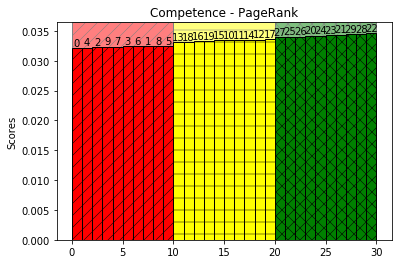

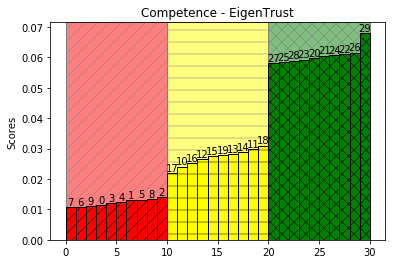

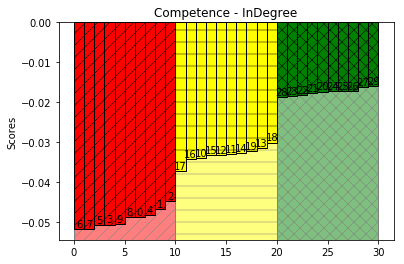

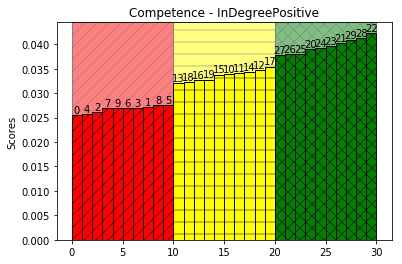

In [15]:
groups = ('low', 'avg', 'high')
colors = {
  'low': 'r',
  'avg': 'yellow',
  'high': 'g'
}
results = community.simulate(ALL_CENTRALITY_SCORES, 100, 100)
for (name, result, intermediate_results) in results:
  c = chart(result, groups, colors, test_name + " - " + name)

print_metrics(name, result, groups)
print_stddev_metrics(name, intermediate_results, groups)